<a href="https://colab.research.google.com/github/FernandoCallasaca/data_science_projects/blob/main/Casos_Fiscales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales/'
!ls

/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales
'Casos Fiscales.ipynb'	 casos_fiscales_pre_procesados.csv   casos_fiscales.xls


In [ ]:
def dir_file(file_name):
  return '/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales/{0}'.format(file_name)

In [ ]:
dir_file_read = dir_file('casos_fiscales.xls')
dir_file_read

'/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales/casos_fiscales.xls'

In [ ]:
df = pd.read_excel(dir_file_read)
df.head(5)

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28.0
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3.0
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305.0
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211.0
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51.0


In [ ]:
df.shape

(4610, 13)

In [ ]:
df.dtypes

periodo                       object
fproceso              datetime64[ns]
anio_ing                       int64
id_df                          int64
distrito_fiscal               object
tipo_fiscalia                 object
materia                       object
especialidad                  object
tipo_caso                     object
sistema                       object
tipo_especializada            object
ingresado                      int64
atendido                     float64
dtype: object

In [ ]:
df.replace(['?', ' '], np.nan, inplace = True)

In [ ]:
missing_data = df.isnull()
missing_data.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False


In [ ]:
for column in missing_data.columns:
  print(column)
  print(missing_data[column].value_counts())
  print()

periodo
False    4610
Name: periodo, dtype: int64

fproceso
False    4610
Name: fproceso, dtype: int64

anio_ing
False    4610
Name: anio_ing, dtype: int64

id_df
False    4610
Name: id_df, dtype: int64

distrito_fiscal
False    4610
Name: distrito_fiscal, dtype: int64

tipo_fiscalia
False    4610
Name: tipo_fiscalia, dtype: int64

materia
False    4610
Name: materia, dtype: int64

especialidad
False    4610
Name: especialidad, dtype: int64

tipo_caso
False    4610
Name: tipo_caso, dtype: int64

sistema
False    4592
True       18
Name: sistema, dtype: int64

tipo_especializada
True     3214
False    1396
Name: tipo_especializada, dtype: int64

ingresado
False    4610
Name: ingresado, dtype: int64

atendido
False    4563
True       47
Name: atendido, dtype: int64



**Basándonos en el resumende de arriba sabemos que cada columna tiene 4610 filas y 3 columnas contienen datos incompletos**

1. 'sistema': 18 datos incompletos
2. 'tipo_especializada': 3214 datos incompletos
3. 'atentido': 47 datos incompletos

**Lidearemos con los datos faltantes:**

1. Podemos borrarlos
2. Podemos reemplazarlos
  1. Promedio(avg) = mean
  2. Dato Frecuente = frecuency
  3. Otro método = Other method

- No podemos sacar el promedio

- En la columna 'sistema' pordemos reemplazar con el más frecuente

- la columna 'atendido' los datos incompletos no nos sirven porque eso vamos a predecir

In [ ]:
df['sistema'].value_counts()

SGF      2472
SIATF    2120
Name: sistema, dtype: int64

In [ ]:
# sacamos el valor más frecuente
df['sistema'].value_counts().idxmax()

'SGF'

In [ ]:
# reemplazamos con el valor más frecuente
df['sistema'].replace(np.nan, 'SGF', inplace=True)

In [ ]:
# eliminamos los valores nan de la columna 'atendido'
df.dropna(subset = ['atendido'], axis = 0, inplace = True)

# como eliminamos los valores nan los índices tenemos que reiniciar
df.reset_index(drop=True, inplace=True)

In [ ]:
# Verificamos si los pasos anteriores se concretaron
df['atendido'].isnull().value_counts()

False    4563
Name: atendido, dtype: int64

In [ ]:
# nuestro nuedo dataframe estaría así
df.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28.0
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3.0
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305.0
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211.0
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51.0


**AHORA PODEMOS CORREGIR EL FORMATO DE LAS COLUMNAS EN CASO ESTÉN INCORRECTOS**

In [ ]:
df.shape

(4563, 13)

In [ ]:
df.dtypes

periodo                       object
fproceso              datetime64[ns]
anio_ing                       int64
id_df                          int64
distrito_fiscal               object
tipo_fiscalia                 object
materia                       object
especialidad                  object
tipo_caso                     object
sistema                       object
tipo_especializada            object
ingresado                      int64
atendido                     float64
dtype: object

In [ ]:
# en caso tendríamos que corregir seguiríamos la siguiente instrucción
df['anio_ing'] = df['anio_ing'].astype('object')
df.dtypes

periodo                       object
fproceso              datetime64[ns]
anio_ing                      object
id_df                          int64
distrito_fiscal               object
tipo_fiscalia                 object
materia                       object
especialidad                  object
tipo_caso                     object
sistema                       object
tipo_especializada            object
ingresado                      int64
atendido                     float64
dtype: object

In [ ]:
# lo volveremos a regresar a entero como estaba antes
df[['anio_ing']] = df[['anio_ing']].astype('int')
df.dtypes

periodo                       object
fproceso              datetime64[ns]
anio_ing                       int64
id_df                          int64
distrito_fiscal               object
tipo_fiscalia                 object
materia                       object
especialidad                  object
tipo_caso                     object
sistema                       object
tipo_especializada            object
ingresado                      int64
atendido                     float64
dtype: object

In [ ]:
# corregimos la columna atendido a int porque está en float
df[['atendido']] = df[['atendido']].astype('int')
df.dtypes

periodo                       object
fproceso              datetime64[ns]
anio_ing                       int64
id_df                          int64
distrito_fiscal               object
tipo_fiscalia                 object
materia                       object
especialidad                  object
tipo_caso                     object
sistema                       object
tipo_especializada            object
ingresado                      int64
atendido                       int64
dtype: object

**AHORA SÍ TENEMOS LOS DATOS CON VALORES INCOMPLETOS QUE NO SIRVAN SACADOS Y LAS COLUMNAS CON SUS RESPECTIVOS TIPOS DE DATOS**

>**ESTANDARIZACIÓN**
>
> No hay nada que estandarizar todos los datos están en su formato común

In [ ]:
df.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51


>**NORMALIZACIÓN**
>
> Podemos transformar los valores de varias variables en un rango similar eso significa que podemos escalar la variable para que los valores de la variable oscilen entre 0 y 1.

> Entonces escalaremos la variable 'ingresado' y 'atendido'

In [ ]:
df['ingresado-norm'] = df['ingresado']/df['ingresado'].max()
df.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,ingresado-norm
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28,0.000643
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3,0.000071
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305,0.004832
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211,0.003245
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51,0.000786


In [ ]:
df['atendido-norm'] = df['atendido']/df['atendido'].max()
df.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,ingresado-norm,atendido-norm
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28,0.000643,0.000436
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3,0.000071,0.000047
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305,0.004832,0.004752
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211,0.003245,0.003288
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51,0.000786,0.000795


In [ ]:
# eliminamos la columna porque no nos servirá
df.drop('atendido-norm', axis = 1, inplace = True)
df.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,ingresado-norm,ingresado-binned,sistema-SGF,sistema-SIATF
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28,0.000643,Ingreso Bajo,0,1
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3,0.000071,Ingreso Bajo,0,1
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305,0.004832,Ingreso Bajo,0,1
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211,0.003245,Ingreso Bajo,0,1
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51,0.000786,Ingreso Bajo,0,1


>**BINNING**
>
> Vamos a procesar la variable numérica continua'atendido' en categórica discreta para hacer un análisis agrupado

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

Text(0.5, 1.0, 'Bins ingresado')

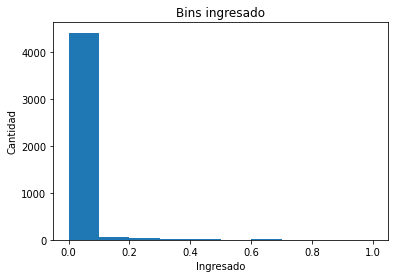

In [ ]:
plt.pyplot.hist(df["ingresado-norm"])

# colocamos los labels x, y y el título
plt.pyplot.xlabel("Ingresado")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Bins ingresado")

> Nos gustaría solo 3 contenedores entonces empezamos binnig

In [ ]:
# como queremos dividir entre 3 entonces separamos a 4
# primero se coloca el menor, luego el mayor
bins = np.linspace(df['ingresado-norm'].min(), df['ingresado-norm'].max(), 4)

bins

array([1.42967432e-05, 3.33342864e-01, 6.66671432e-01, 1.00000000e+00])

In [ ]:
# ahora insertamos los nombres de los grupos
group_names = ['Ingreso Bajo', 'Ingreso Medio', 'Ingreso Alto']
group_names

['Ingreso Bajo', 'Ingreso Medio', 'Ingreso Alto']

In [ ]:
# ahora agregamos al df
df['ingresado-binned'] = pd.cut(df['ingresado-norm'], bins, labels = group_names, include_lowest = True)

In [ ]:
df[['ingresado-norm', 'ingresado-binned']].head(20)

,ingresado-norm,ingresado-binned
0,0.000643,Ingreso Bajo
1,0.000071,Ingreso Bajo
2,0.004832,Ingreso Bajo
3,0.003245,Ingreso Bajo
4,0.000786,Ingreso Bajo
5,0.003603,Ingreso Bajo
6,0.000429,Ingreso Bajo
7,0.000129,Ingreso Bajo
8,0.000043,Ingreso Bajo
9,0.002902,Ingreso Bajo


In [ ]:
df['ingresado-binned'].value_counts()

Ingreso Bajo     4517
Ingreso Medio      36
Ingreso Alto       10
Name: ingresado-binned, dtype: int64

Text(0.5, 1.0, 'Bins Ingresados')

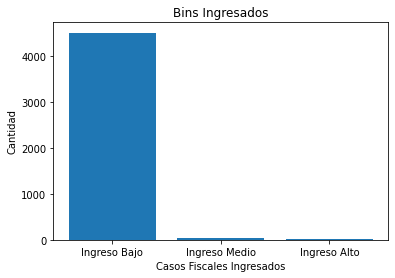

In [ ]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(group_names, df["ingresado-binned"].value_counts())

# colocamos los labels x, y y el título
plt.pyplot.xlabel("Casos Fiscales Ingresados")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Bins Ingresados")

Text(0.5, 1.0, 'Bins Ingresados')

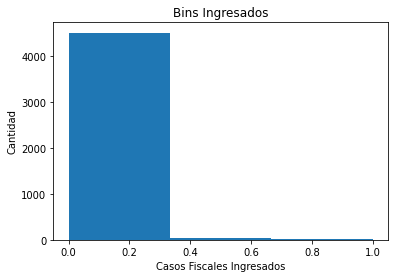

In [ ]:
# normalmente se hace de la siguiente manera y conseguimos lo mismo
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df['ingresado-norm'], bins=3)

# colocamos los labels x, y y el título
plt.pyplot.xlabel("Casos Fiscales Ingresados")
plt.pyplot.ylabel("Cantidad")
plt.pyplot.title("Bins Ingresados")

>**VARIABLE DE INDICADOR (O VARIABLE FICTICIA) = Dummy**
>
> Usamos variables indicadoras para poder usar variables categóricas para el análisis de regresión en los módulos posteriores.

> Usaremos la columna 'sistema' ya que solo puede tener 2 valores
> 1. SIATF
> 2. SGF

In [ ]:
df['sistema'].value_counts()

SGF      2461
SIATF    2102
Name: sistema, dtype: int64

In [ ]:
# creamos su valores numéricos
df_dummy_sistema = pd.get_dummies(df['sistema'])
df_dummy_sistema.head()

,SGF,SIATF
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# cambiamos el nombre de las columnas del dataframe dummy
df_dummy_sistema.rename(columns = {'SGF': 'sistema-SGF', 'SIATF': 'sistema-SIATF'}, inplace = True)
df_dummy_sistema.head()

,sistema-SGF,sistema-SIATF
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
# ahora unimos dataframe df y dataframe df_dummy_sistema
df = pd.concat([df, df_dummy_sistema], axis = 1)
df.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,ingresado-norm,ingresado-binned,sistema-SGF,sistema-SIATF
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28,0.000643,Ingreso Bajo,0,1
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3,0.000071,Ingreso Bajo,0,1
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305,0.004832,Ingreso Bajo,0,1
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211,0.003245,Ingreso Bajo,0,1
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51,0.000786,Ingreso Bajo,0,1


In [ ]:
# lo normal sería eliminar pero en este caso no lo haremos
# pero en el caso que necesitemos sería de la siguiente forma
# axis = 1 para eliminar la columna
# inplace = True para que los cambios se realicen autompaticamente en el dataframe

# df.drop('sistema', axis = 1, inplace = True)

In [ ]:
# revisamos si en realidad cambio
df[['sistema', 'sistema-SGF', 'sistema-SIATF']].head(20)

,sistema,sistema-SGF,sistema-SIATF
0,SIATF,0,1
1,SIATF,0,1
2,SIATF,0,1
3,SIATF,0,1
4,SIATF,0,1
5,SIATF,0,1
6,SIATF,0,1
7,SIATF,0,1
8,SIATF,0,1
9,SGF,1,0


In [ ]:
# ahora guardamos el dataframe en un csv para guardar todo el avance hasta el momento
# primero creamos la ruta a la que se guardará incluido el nombre
file_to_save = dir_file('casos_fiscales_pre_procesados.csv')
file_to_save

'/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales/casos_fiscales_pre_procesados.csv'

In [ ]:
# ahora si podemos guardar
df.to_csv(file_to_save, sep = ',', index = False)

OTRO

In [3]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales/'
!ls

/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales
'Casos Fiscales.ipynb'	 casos_fiscales_pre_procesados.csv   casos_fiscales.xls


In [5]:
pd.options.display.float_format = '{:,.3f}'.format

In [6]:
df_cf = pd.read_excel('/content/drive/My Drive/Data Science/Proyectos/Casos Fiscales/casos_fiscales.xls')
df_cf.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28.000
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3.000
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305.000
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211.000
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51.000


In [7]:
df_cf_missing = df_cf.isnull()
df_cf_missing.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido
0,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
for column in df_cf_missing.columns:
  print(column)
  print(df_cf_missing[column].value_counts())
  print()

periodo
False    4610
Name: periodo, dtype: int64

fproceso
False    4610
Name: fproceso, dtype: int64

anio_ing
False    4610
Name: anio_ing, dtype: int64

id_df
False    4610
Name: id_df, dtype: int64

distrito_fiscal
False    4610
Name: distrito_fiscal, dtype: int64

tipo_fiscalia
False    4610
Name: tipo_fiscalia, dtype: int64

materia
False    4610
Name: materia, dtype: int64

especialidad
False    4610
Name: especialidad, dtype: int64

tipo_caso
False    4610
Name: tipo_caso, dtype: int64

sistema
False    4592
True       18
Name: sistema, dtype: int64

tipo_especializada
True     3214
False    1396
Name: tipo_especializada, dtype: int64

ingresado
False    4610
Name: ingresado, dtype: int64

atendido
False    4563
True       47
Name: atendido, dtype: int64



In [9]:
# sacamos el máximo de sistema
df_cf['sistema'].value_counts().idxmax()

'SGF'

In [10]:
df_cf['sistema'].replace(np.nan, 'SGF', inplace = True)

In [11]:
# verificamos si reemplazo
df_cf['sistema'].value_counts()

SGF      2490
SIATF    2120
Name: sistema, dtype: int64

In [12]:
# reeplazamos los atendidos nan por 0
df_cf['atendido'].replace(np.nan, 0, inplace = True)

In [13]:
# nuevamente calculamos el porcentaje de atendidos
df_cf['porcentajes_atendidos'] = (df_cf['atendido']/df_cf['ingresado'])*100

In [14]:
# ahora nuevamente verificamos si hay valores nulos
missing_df_cf = df_cf.isnull()
for column in missing_df_cf.columns:
  print(column)
  print(missing_df_cf[column].value_counts())
  print()

periodo
False    4610
Name: periodo, dtype: int64

fproceso
False    4610
Name: fproceso, dtype: int64

anio_ing
False    4610
Name: anio_ing, dtype: int64

id_df
False    4610
Name: id_df, dtype: int64

distrito_fiscal
False    4610
Name: distrito_fiscal, dtype: int64

tipo_fiscalia
False    4610
Name: tipo_fiscalia, dtype: int64

materia
False    4610
Name: materia, dtype: int64

especialidad
False    4610
Name: especialidad, dtype: int64

tipo_caso
False    4610
Name: tipo_caso, dtype: int64

sistema
False    4610
Name: sistema, dtype: int64

tipo_especializada
True     3214
False    1396
Name: tipo_especializada, dtype: int64

ingresado
False    4610
Name: ingresado, dtype: int64

atendido
False    4610
Name: atendido, dtype: int64

porcentajes_atendidos
False    4610
Name: porcentajes_atendidos, dtype: int64



In [15]:
#ya que tenemos todo verificamos nuevamente nuestro df
df_cf.head()

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,porcentajes_atendidos
0,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,CIVIL,CIVIL,EXPEDIENTE,SIATF,NaN,45,28.000,62.222
1,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,ACTOS CONTRA LA LIBERTAD SEXUAL,DENUNCIA,SIATF,NaN,5,3.000,60.000
2,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA CIVIL,EXPEDIENTE,SIATF,NaN,338,305.000,90.237
3,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,227,211.000,92.952
4,01/01/2021 - 31/08/2021,2021-09-10,2021,1,AMAZONAS,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,55,51.000,92.727


In [16]:
# la variable sistema lo pondremos en una variable numérica
dummies_sistema_cf = pd.get_dummies(df_cf['sistema'])
dummies_sistema_cf.head()

,SGF,SIATF
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [17]:
# cambiamos nombre y luego agregamos a nuestro df original
dummies_sistema_cf.rename(columns={'SGF': 'sistema-SGF', 'SIATF': 'sistema-SIATF'}, inplace = True)
df_cf = pd.concat([df_cf, dummies_sistema_cf], axis = 1)

In [18]:
df_cf.sample(10)

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,porcentajes_atendidos,sistema-SGF,sistema-SIATF
3607,01/01/2020 - 31/12/2020,2021-01-08,2020,5,AYACUCHO,PROVINCIAL,PENAL,PENAL,DENUNCIA,SGF,12 ESPECIALIZADA EN DELITOS DE TRAFICOS ILICIT...,221,214.000,96.833,1,0
4052,01/01/2020 - 31/12/2020,2021-01-08,2020,18,LIMA ESTE,PROVINCIAL,FAMILIA,FAMILIA TUTELAR,EXPEDIENTE,SIATF,NaN,34,29.000,85.294,0,1
3438,01/01/2018 - 31/12/2018,2019-01-11,2018,29,SELVA CENTRAL,SUPERIOR,PENAL,PENAL,QUEJAS,SGF,NaN,296,296.000,100.000,1,0
794,01/01/2021 - 31/08/2021,2021-09-10,2021,21,LORETO,SUPERIOR,PENAL,PENAL,EXPEDIENTE,SGF,NaN,122,93.000,76.230,1,0
1043,01/01/2018 - 31/12/2018,2019-01-11,2018,26,PUNO,PROVINCIAL,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,131,121.000,92.366,0,1
3480,01/01/2020 - 31/12/2020,2021-01-08,2020,2,ANCASH,PROVINCIAL,FAMILIA,FAMILIA TUTELAR,EXPEDIENTE,SIATF,NaN,55,52.000,94.545,0,1
101,01/01/2021 - 31/08/2021,2021-09-10,2021,3,APURIMAC,SUPERIOR,PENAL,PENAL,EXCLUSION FISCAL,SGF,NaN,1,1.000,100.000,1,0
4565,01/01/2020 - 31/12/2020,2021-01-08,2020,34,LIMA NOROESTE,SUPERIOR,FAMILIA,FAMILIA PENAL,EXPEDIENTE,SIATF,NaN,5,5.000,100.000,0,1
4084,01/01/2020 - 31/12/2020,2021-01-08,2020,19,LIMA NORTE,PROVINCIAL,FAMILIA,VIOLENCIA FAMILIAR,DENUNCIA,SIATF,NaN,67,67.000,100.000,0,1
2688,01/01/2019 - 31/12/2019,2020-01-13,2019,18,LIMA ESTE,PROVINCIAL,FAMILIA,FAMILIA PENAL,DENUNCIA,SIATF,NaN,1411,"1,327.000",94.047,0,1


In [19]:
# ya que nos dimos cuenta que hay un porcentaje de atendidos mas del
# 100% porque hay más atendidos que ingresados
# entonces pasaremos a estandarizar a 100 esos valores
df_cf['porcentajes_atendidos'] = np.where(df_cf['porcentajes_atendidos'] > 100, 100, df_cf['porcentajes_atendidos'])

In [25]:
df_cf[df_cf['atendido'] > df_cf['ingresado']]

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,porcentajes_atendidos,sistema-SGF,sistema-SIATF
3342,01/01/2021 - 31/08/2021,2021-09-10,2021,17,LIMA,SUPREMA,PENAL,PENAL,PROCESO PENAL,SGF,NaN,1148,"1,212.000",100.000,1,0
3343,01/01/2021 - 31/08/2021,2021-09-10,2021,17,LIMA,SUPREMA,FAMILIA,FAMILIA,PROCESO FAMILIA,SGF,NaN,15,19.000,100.000,1,0
3454,01/01/2020 - 31/12/2020,2021-01-08,2020,17,LIMA,SUPREMA,PENAL,PENAL,PROCESO PENAL,SGF,NaN,1176,"1,277.000",100.000,1,0
4554,01/01/2019 - 31/12/2019,2020-01-13,2019,17,LIMA,SUPREMA,CIVIL,CIVIL,PROCESO CIVIL,SGF,NaN,273,293.000,100.000,1,0
4555,01/01/2019 - 31/12/2019,2020-01-13,2019,17,LIMA,SUPREMA,CONTENCIOSO ADMINISTRATIVO,CONTENCIOSO ADMINISTRATIVO,PROCESO CONTENCIOSO,SGF,NaN,2292,"2,590.000",100.000,1,0
4607,01/01/2020 - 31/12/2020,2021-01-08,2020,17,LIMA,SUPREMA,CIVIL,CIVIL,PROCESO CIVIL,SGF,NaN,32,33.000,100.000,1,0
4608,01/01/2020 - 31/12/2020,2021-01-08,2020,17,LIMA,SUPREMA,CONTENCIOSO ADMINISTRATIVO,CONTENCIOSO ADMINISTRATIVO,PROCESO CONTENCIOSO,SGF,NaN,179,195.000,100.000,1,0


In [26]:
# ahora vamos a separar en 3 partes el porcentaje de atendidos para ver si hay 
# más porcentaje atendidos o no a nivel nacional
bins = np.linspace(df_cf['porcentajes_atendidos'].min(), df_cf['porcentajes_atendidos'].max(), 4)
bins

array([  0.        ,  33.33333333,  66.66666667, 100.        ])

In [27]:
# creamos los nombres de las valores
labels = ['Atención Baja', 'Atención Media', 'Atención Alta']
labels

['Atención Baja', 'Atención Media', 'Atención Alta']

In [28]:
# creamos el binning con el metodo cut de pandas
df_cf['porcentajes_atendidos-categorizado'] = pd.cut(df_cf['porcentajes_atendidos'], bins, labels = labels, include_lowest = True)

In [36]:
df_cf.sample(5)

,periodo,fproceso,anio_ing,id_df,distrito_fiscal,tipo_fiscalia,materia,especialidad,tipo_caso,sistema,tipo_especializada,ingresado,atendido,porcentajes_atendidos,sistema-SGF,sistema-SIATF,porcentajes_atendidos-categorizado
3078,01/01/2019 - 31/12/2019,2020-01-13,2019,29,SELVA CENTRAL,PROVINCIAL,PENAL,PENAL,INVESTIGACION PREVENTIVA,SGF,11 ESPECIALIZADA EN PREVENCION DEL DELITO,150,150.000,100.000,1,0,Atención Alta
3651,01/01/2020 - 31/12/2020,2021-01-08,2020,6,CAJAMARCA,SUPERIOR,PENAL,PENAL,APELACION EXPEDIENTE,SGF,NaN,64,64.000,100.000,1,0,Atención Alta
3715,01/01/2020 - 31/12/2020,2021-01-08,2020,8,CAÑETE,SUPERIOR,FAMILIA,FAMILIA PENAL,INCIDENTE,SIATF,NaN,2,2.000,100.000,0,1,Atención Alta
2097,01/01/2018 - 31/12/2018,2019-01-11,2018,16,LAMBAYEQUE,SUPERIOR,PENAL,PENAL,QUEJAS,SGF,NaN,1751,"1,673.000",95.545,1,0,Atención Alta
4609,01/01/2020 - 31/12/2020,2021-01-08,2020,17,LIMA,SUPREMA,CONTROL INTERNO,CONTROL INTERNO,QUEJAS,SGF,NaN,8934,"7,992.000",89.456,1,0,Atención Alta


In [37]:
df_cf['porcentajes_atendidos-categorizado'].value_counts()

Atención Alta     4306
Atención Media     215
Atención Baja       89
Name: porcentajes_atendidos-categorizado, dtype: int64

Text(0.5, 1.0, 'Binning Atendidos')

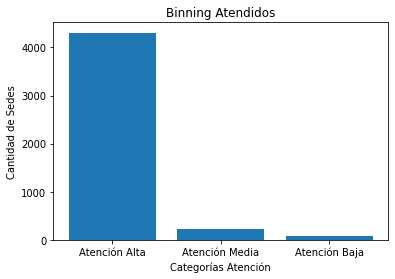

In [45]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

pyplot.bar(['Atención Alta', 'Atención Media', 'Atención Baja'], df_cf["porcentajes_atendidos-categorizado"].value_counts())

# colocamos los labels x, y y el título
plt.pyplot.xlabel("Categorías Atención")
plt.pyplot.ylabel("Cantidad de Sedes")
plt.pyplot.title("Binning Atendidos")